In [87]:
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
import json
import osm2geojson
import contextily as ctx

from os import environ
environ["PROJ_LIB"] = "/home/debian/miniconda3/envs/geo/lib/python3.8/site-packages/rasterio/proj_data"

In [242]:
def get_osm_data(lat, lng):
    # print(lat, lng)
    overpass_url = "http://overpass-api.de/api/interpreter"
    # 60.148809, 24.916404 helsinki
    # 51.888806, 4.429777 amsterdam
    # 60.18636636163917 24.83902037143707 otaniemi              
    overpass_query = """
    [out:json][timeout:25];
    nwr[~"^(natural|area|pier)$"~"."](around:200,""" + f'{lat},{lng}' + """);
    out geom;
    """
    response = requests.get(overpass_url, 
                            params={'data': overpass_query})
    data = response.json()
    return osm2geojson.json2geojson(data)


51.88692186814117 4.2840078206463685
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'type': 'relation', 'id': 13070155, 'tags': {'natural': 'water', 'type': 'multipolygon', 'water': 'harbour', 'wikidata': 'Q1892864'}}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[4.2820895, 51.8854948], [4.2821179, 51.8855161], [4.2821169, 51.8855568], [4.2817098, 51.8863193], [4.2816892, 51.8864101], [4.2812849, 51.8871662], [4.2809496, 51.8877866], [4.2809483, 51.8878372], [4.2811902, 51.8881381], [4.2812341, 51.8881629], [4.2817641, 51.8882718], [4.2818922, 51.8882907], [4.282464, 51.8884051], [4.2829264, 51.8884859], [4.2830127, 51.8884979], [4.2835169, 51.8885903], [4.2835746, 51.8885908], [4.283635, 51.8885849], [4.2837803, 51.888549], [4.2840286, 51.8884799], [4.2841586, 51.888421], [4.2844723, 51.8878279], [4.284954, 51.8869035], [4.2850198, 51.8867906], [4.2851846, 51.8864885], [4.2855671, 51.8857645], [4.2855888, 51.8857369], [4.2820895, 51.8854948]]]

<AxesSubplot:>

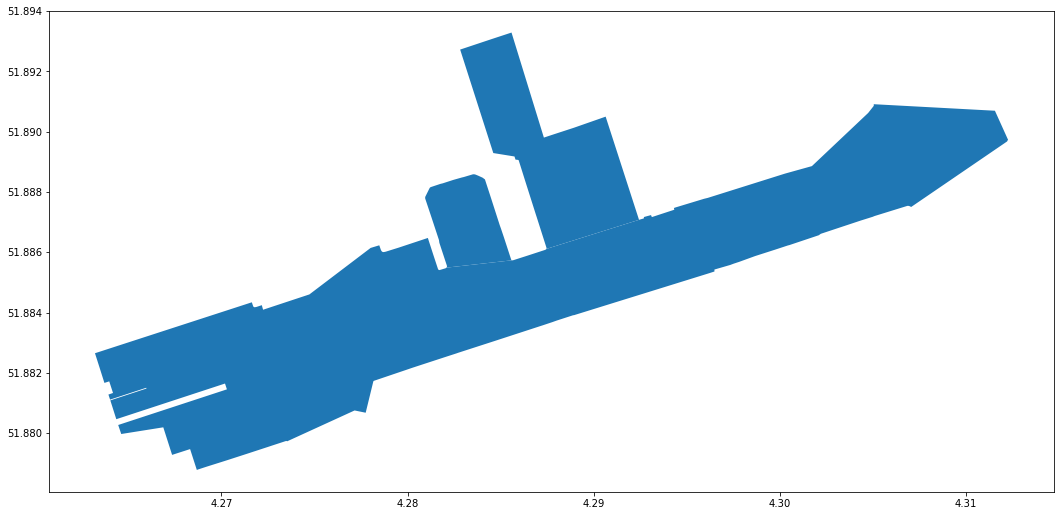

In [241]:
geojson = get_osm_data(51.88692186814117, 4.2840078206463685)
print(geojson)
gdf = gpd.GeoDataFrame.from_features(geojson)
gdf.crs = 'epsg:4326'
f, ax = plt.subplots(1, figsize=(18, 18))
gdf.plot(ax=ax)

#no_ferry = gdf[gdf["tags"]][gdf["tags"].apply(lambda x: "ferry" not in x)]
#no_ferry.plot()

In [290]:
polygons = gpd.read_file("test-data.geojson")
#for index, geom in polygons.head(5).iterrows():
def plot_test(index):
    geom = polygons.iloc[[index]].geometry
    """# polygon edges as linestrings
    i = 0
    points = geom.coords
    print(points)
    
    return"""

    # plotting
    f, ax = plt.subplots(1, figsize=(18, 18))
    gs = gpd.GeoSeries(geom, crs=4326)
    gs = gs.to_crs(3857)
    buffer = gs.geometry.buffer(200)
    buffer.plot(alpha=0, ax=ax)
    centroid_4326 = gs.centroid.to_crs(4326)
    osm_gdf = gpd.GeoDataFrame.from_features(
        get_osm_data(float(centroid_4326.y), float(centroid_4326.x))
    )
    osm_gdf.crs = 'epsg:4326'
    ctx.add_basemap(
        ax,
        source=ctx.providers.CartoDB.Positron
    )
    plt.autoscale(False)
    osm_intersection = gpd.clip(osm_gdf, buffer.buffer(200).to_crs(4326).geometry).to_crs(3857)
    osm_intersection.plot(ax=ax, facecolor="#0000", edgecolor="#f004", linewidth=5)
    gs.plot(ax = ax)
    ax.set_axis_off()
plot_test(1)

AttributeError: 'GeoSeries' object has no attribute 'coords'

In [285]:
plot_test(1)
plot_test(2)
plot_test(3)

KeyError: 0